In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.2MB/s 
     |████████████████████████████████| 204kB 18.5MB/s 
     |████████████████████████████████| 1.2MB 18.8MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [4]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [5]:
# get the validaition data
threes_valid = (path/'valid'/'3').ls().sorted()
sevens_valid = (path/'valid'/'7').ls().sorted()
threes_valid

(#1010) [Path('valid/3/1020.png'),Path('valid/3/1028.png'),Path('valid/3/1042.png'),Path('valid/3/1062.png'),Path('valid/3/1066.png'),Path('valid/3/1067.png'),Path('valid/3/1069.png'),Path('valid/3/1072.png'),Path('valid/3/1092.png'),Path('valid/3/1095.png')...]

In [8]:
path_to_tensor = lambda file_list: torch.stack([tensor(Image.open(img_path)) for img_path in file_list]).float()/255

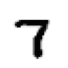

In [11]:
train_sevens = path_to_tensor(sevens)
train_sevens.shape
show_image(train_sevens[0])

In [18]:
# create list tensors for training an validation sets
train_threes = path_to_tensor(threes)
valid_threes = path_to_tensor(threes_valid)
valid_sevens = path_to_tensor(sevens_valid)
valid_sevens.shape

torch.Size([1028, 28, 28])

###**Get clear dependant/independant variable sets, a way to initialize parameters, a simple model, and a loss using sigmoid**

In [19]:
# create training x and y
train_x = torch.cat([train_threes, train_sevens]).view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [20]:
# create a list containing 1 for 3s and 0 for 7s, turn into tensor of size x 1
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [21]:
valid_x = torch.cat([valid_threes, valid_sevens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_threes) + [0]*len(valid_sevens)).unsqueeze(1)
valid_x.shape, valid_y.shape

(torch.Size([2038, 784]), torch.Size([2038, 1]))

In [24]:
from typing import Tuple
# create a function to initialize parameters which require grad from pytorch
def init_params(size: Tuple):
  return torch.randn(size).requires_grad_()

In [25]:
# create basic model weights
weights = init_params((28*28, 1))
weights.shape

torch.Size([784, 1])

In [26]:
# create basic model bias
bias = init_params((1))
bias.shape

torch.Size([1])

In [27]:
# manually implement a linear model 
def manual_linear(train_x):
  # perform matrix multiplication between train_x and weights
  # note shape of train_x = n x 784 and weights = 784 x 1 => matrix multiplication works with output n x 1
  return train_x@weights + bias